# 简单工厂

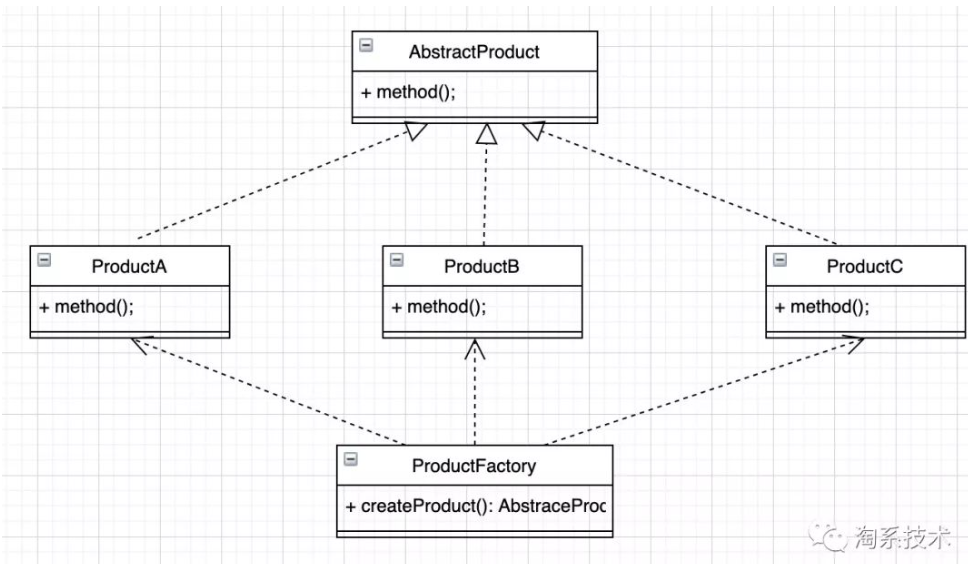

In [ ]:
from abc import ABCMeta, abstractmethod

In [2]:
class Animal(metaclass=ABCMeta):
    @abstractmethod
    def do_say(self):
        pass

In [5]:
class Dog(Animal):
    def do_say(self):
        print("Bhow Bhow!!")
        return
    
class Cat(Animal):
    def do_say(self):
        print("Meow Meow")
        return

class ForestFactory(object):
    def make_sound(self, object_type):
        return eval(object_type)().do_say()
    
ff = ForestFactory()
animal = input("Which animal should make sound, Dog or Cat?")
ff.make_sound(animal)

Which animal should make sound, Dog or Cat?Cat
Meow Meow


#工厂方法模式

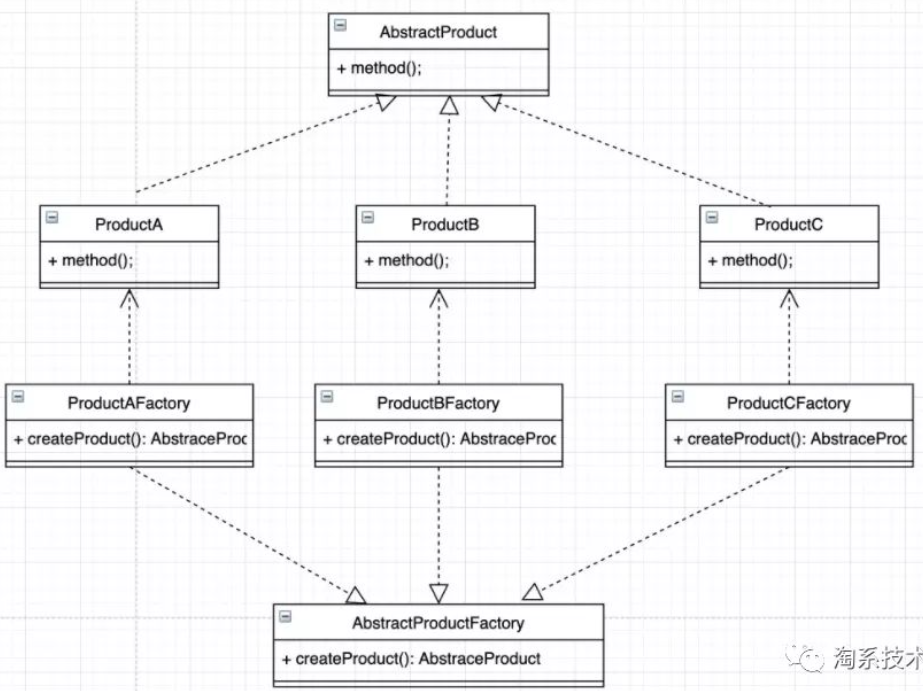

In [6]:
from abc import ABCMeta, abstractclassmethod
class Section(metaclass=ABCMeta):
    @abstractclassmethod
    def describe(self):
        pass
    
class PersonalSection(Section):
    def describe(self):
        print("Personal Section")
        return
    
class AlbumSection(Section):
    def describe(self):
        print("Album Section")
        return
    
class PatentSection(Section):
    def describe(self):
        print("Patent Section")
        return

class PublicationSection(Section):
    def describe(self):
        print("Publication Section")
        return
    

In [7]:
class Profile(metaclass=ABCMeta):
    def __init__(self):
        self.sections = []
        self.createProfile()
    
    @abstractclassmethod
    def createProfile(self):
        pass
    
    def getSection(self):
        return self.sections
    
    def addSections(self, section):
        self.sections.append(section)
    
class linkedin(Profile):
    def createProfile(self):
        self.addSections(PersonalSection())
        self.addSections(PatentSection())
        self.addSections(PublicationSection())
        
class facebook(Profile):
    def createProfile(self):
        self.addSections(PersonalSection())
        self.addSections(AlbumSection())
        
profile_type = input("Which profile you'd like to create? [LinkedIn or FaceBook]")
profile = eval(profile_type.lower())()
print("Creating profile..", type(profile).__name__)
print("Profile has sections --", profile.getSection())

Which profile you'd like to create? [LinkedIn or FaceBook]facebook
Creating profile.. facebook
Profile has sections -- [<__main__.PersonalSection object at 0x000001AED0D5E4C0>, <__main__.AlbumSection object at 0x000001AED0D5E850>]


# 抽象工厂
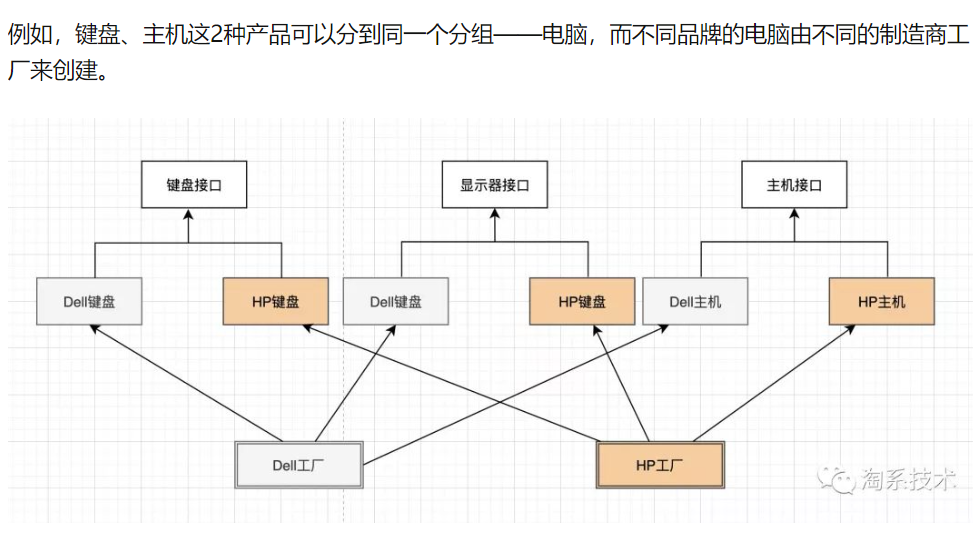
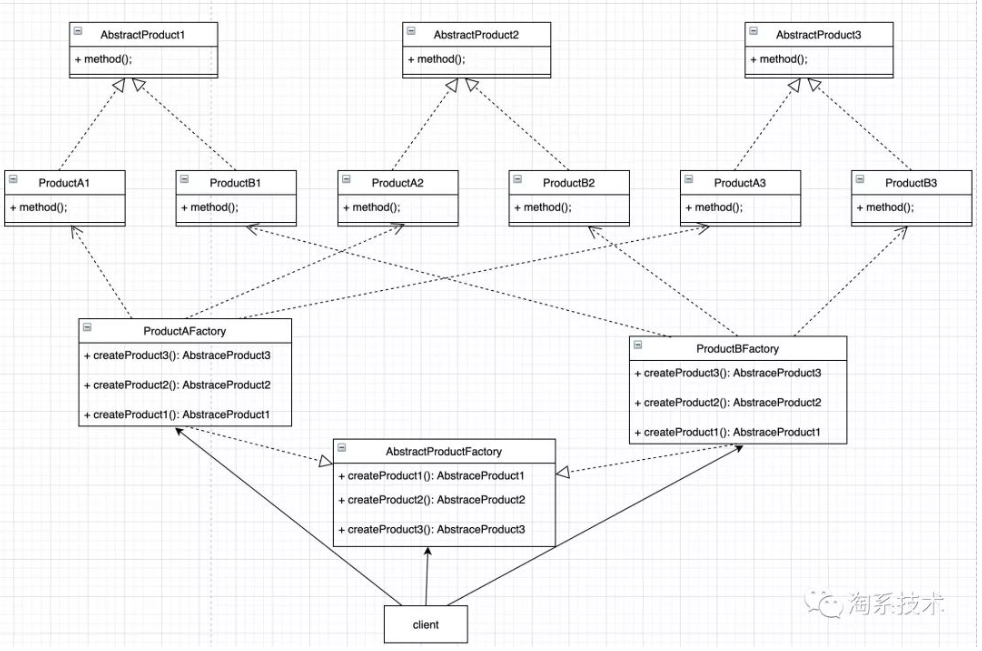

In [8]:
from abc import ABCMeta, abstractclassmethod

class VegPizza(metaclass=ABCMeta):
    @abstractclassmethod
    def prepare(self, VegPizza):
        pass
    
class NonVegPizza(metaclass=ABCMeta):
    @abstractclassmethod
    def serve(self, VegPizza):
        pass
    
class DeluxVeggiePizza(VegPizza):
    def prepare(self):
        print("Prepare ", type(self).__name__)
        return
    
class ChickenPizza(NonVegPizza):
    def serve(self, VegPizza):
        print(type(self).__name__, " is served with Chicken on ", type(VegPizza).__name__)
        return

class MexicanVegPizza(VegPizza):
    def prepare(self):
        print("Prepare ", type(self).__name__)
        return

class HamPizza(NonVegPizza):
    def serve(self, VegPizza):
        print(type(self).__name__, " is served with Ham on ", type(VegPizza).__name__)

In [9]:
class PizzaFactory(metaclass=ABCMeta):
    @abstractclassmethod
    def createVegPizza(self):
        pass
    
    @abstractclassmethod
    def createNonVegPizza(self):
        pass
    
class IndiaPizzaFactory(PizzaFactory):
    def createVegPizza(self):
        return DeluxVeggiePizza()
    
    def createNonVegPizza(self):
        return ChickenPizza()
    
class USPizzaFactory(PizzaFactory):
    def createVegPizza(self):
        return MexicanVegPizza()
    
    def createNonVegPizza(self):
        return HamPizza()
    
class PizzaStore:
    def __init__(self):
        pass
    def makePizzas(self):
        for factory in [IndiaPizzaFactory(), USPizzaFactory()]:
            self.factory = factory
            self.NonVegPizza = self.factory.createNonVegPizza()
            self.VegPizza = self.factory.createVegPizza()
            self.VegPizza.prepare()
            self.NonVegPizza.serve(self.VegPizza)
        return
    
pizza = PizzaStore()
pizza.makePizzas()

Prepare  DeluxVeggiePizza
ChickenPizza  is served with Chicken on  DeluxVeggiePizza
Prepare  MexicanVegPizza
HamPizza  is served with Ham on  MexicanVegPizza
